In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files

In [3]:
movies = ("rotten_tomatoes_movies.csv")
tmdb = ("tmdb_movies_data.csv")
movie_data = pd.read_csv(movies)
tmdb_data = pd.read_csv(tmdb)
movie_data.head()

,rotten_tomatoes_link,Movie Title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [4]:
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,Movie Title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
tmdb_data["Title Release"] = ""
tmdb_data["runtime"] = tmdb_data["runtime"].astype(str)
tmdb_data["Title Release"] = tmdb_data["Movie Title"] + " " + tmdb_data["runtime"] +".0"
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,Movie Title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Title Release
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Jurassic World 124.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Mad Max: Fury Road 120.0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Insurgent 119.0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,Star Wars: The Force Awakens 136.0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Furious 7 137.0


In [6]:

movie_data = movie_data.rename(columns={"rotten_tomatoes_link": "Link",
                                       "movie_info": "Movie Info", "studio_name": "Studio", "tomatometer_status": "Tomatometer Status",
                                       "tomatometer_rating": "Tomatometer Rating", "tomatometer_count": "Tomatometer Count", "runtime_in_minutes": "Runtime", "in_theaters_date": "Theater Release", "audience_status": "Audience Status",
                                       "audience_rating": "Audience Rating", "audience_count": "Audience Count", "audience_top_critics_count": "Audience Top Critics Count",
                                       "audience_fresh_critics_count": " Audience Fresh Critics Count", "audience_rotten_critics_count": "Audience Rotten Critics Count"})
movie_data.head(3)

,Link,Movie Title,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,Studio,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Audience Top Critics Count,Audience Fresh Critics Count,Audience Rotten Critics Count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7


In [7]:
movie_data["Title Release"] = ""
movie_data["Runtime"] = movie_data["Runtime"].astype(str)
movie_data["Title Release"] = movie_data["Movie Title"] + " " + movie_data["Runtime"]
movie_data.head()

,Link,Movie Title,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Audience Top Critics Count,Audience Fresh Critics Count,Audience Rotten Critics Count,Title Release
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,Rotten,49,144,Spilled,53.0,254287.0,38,71,73,Percy Jackson & the Olympians: The Lightning T...
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19,Please Give 90.0
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Fresh,68,22,Spilled,53.0,14670.0,2,15,7,10 118.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0,12 Angry Men (Twelve Angry Men) 95.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Fresh,89,27,Upright,74.0,68860.0,5,24,3,"20,000 Leagues Under The Sea 127.0"


In [8]:
combined_movie = pd.merge(movie_data, tmdb_data, how ='left', on='Title Release')

combined_movie


,Link,Movie Title_x,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast_x,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,"In New York City, a husband and wife butt head...",90,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3000000.000,0.0
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,/m/zoot_suit,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,https://resizing.flixster.com/aN813Th-ct2RYBoO...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16640,/m/zootopia,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,https://resizing.flixster.com/fBep1-c91oIjvXBM...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16641,/m/zorba_the_greek,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,https://resizing.flixster.com/dpBkx_TAP6Z0P0Pl...,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",...,An uptight English writer traveling to Crete o...,142,Adventure|Drama,Twentieth Century Fox Film Corporation,12/14/1964,20.0,6.6,1964.0,5504699.382,0.0
16642,/m/zulu,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,https://resizing.flixster.com/lwPbtPs4ikIa2JNy...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
combined_movie.columns


Index(['Link', 'Movie Title_x', 'Movie Info', 'critics_consensus',
       'poster_image_url', 'rating', 'genre', 'directors', 'writers', 'cast_x',
       'Theater Release', 'on_streaming_date', 'Runtime', 'Studio',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Audience Top Critics Count', ' Audience Fresh Critics Count',
       'Audience Rotten Critics Count', 'Title Release', 'id', 'imdb_id',
       'popularity', 'budget', 'revenue', 'Movie Title_y', 'cast_y',
       'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [10]:
combined_movie = combined_movie.rename(columns={"budget": "Budget", "revenue": "Revenue"})
combined_movie = combined_movie.dropna(subset=['Budget', "Revenue"])
combined_movie.head()

,Link,Movie Title_x,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast_x,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,"In New York City, a husband and wife butt head...",90,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3.000000e+06,0.00
22,/m/10003925-dead_end,Dead End,A family making their annual Christmas pilgrim...,NaN,https://resizing.flixster.com/xe8wB-pFYcOByS1U...,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bap...","Jean-Baptiste Andrea, Fabrice Canepa","Ray Wise, Lin Shaye, Mick Cain, Alexandra Hold...",...,Christmas Eve. On his way to his in-laws with ...,85,Mystery|Horror|Thriller,Sagittaire Films|Captain Movies,1/30/2003,49.0,6.5,2003.0,0.000000e+00,0.00
30,/m/10004504-ultraviolet,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,https://resizing.flixster.com/i1vI9FQioTCmZCH9...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",...,A beautiful hemophage infected with a virus th...,88,Science Fiction|Action|Thriller,Screen Gems|Ultravi Productions,3/3/2006,256.0,5.0,2006.0,3.245007e+07,33607688.98
42,/m/10005499-oliver_twist,Oliver Twist,Director Roman Polanski gives one of Charles D...,Polanski's version of Dickens' classic won't h...,https://resizing.flixster.com/dTa7ktj24R4SiE83...,PG-13,"Drama, Kids & Family",Roman Polanski,Ronald Harwood,"Ben Kingsley, Barney Clark, Leanne Rowe, Mark ...",...,Oliver Twist the modern filmed version of Char...,130,Crime|Drama|Family,R.P. Productions|ETIC Films|Runteam III Ltd.,9/23/2005,143.0,6.6,2005.0,5.582816e+07,47000286.85
55,/m/10006343-dirty,Dirty,"In a city ravaged by violent crime, the police...",Dirty is an unoriginal L.A. cop drama that wea...,https://resizing.flixster.com/ion4o_HWv9groxeI...,R,Drama,Chris Fisher,"Chris Fisher, Gil Reavill, Eric Saks","Cuba Gooding Jr., Wyclef Jean, Keith David, Ai...",...,Two gangbangers-turned-cops try and cover up a...,97,Crime|Drama|Thriller,Deviant Films|Silver Nitrate Pictures,11/10/2005,17.0,5.7,2005.0,3.349690e+06,0.00


In [11]:
combined_movie.columns

Index(['Link', 'Movie Title_x', 'Movie Info', 'critics_consensus',
       'poster_image_url', 'rating', 'genre', 'directors', 'writers', 'cast_x',
       'Theater Release', 'on_streaming_date', 'Runtime', 'Studio',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Audience Top Critics Count', ' Audience Fresh Critics Count',
       'Audience Rotten Critics Count', 'Title Release', 'id', 'imdb_id',
       'popularity', 'Budget', 'Revenue', 'Movie Title_y', 'cast_y',
       'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [12]:
refined_movie_data = combined_movie[["Movie Title_x", "Studio","Theater Release","Budget", "Revenue", "Tomatometer Status", 
                                     "Tomatometer Count", "Tomatometer Rating", "Runtime", "Audience Status", "Audience Rating", "Audience Count"]]
refined_movie_data


,Movie Title_x,Studio,Theater Release,Budget,Revenue,Tomatometer Status,Tomatometer Count,Tomatometer Rating,Runtime,Audience Status,Audience Rating,Audience Count
1,Please Give,Sony Pictures Classics,4/30/2010,3000000.0,0.0,Certified Fresh,140,86,90.0,Upright,64.0,11567.0
22,Dead End,LionsGate Entertainment,9/26/2003,0.0,0.0,Fresh,8,75,85.0,Upright,60.0,10351.0
30,Ultraviolet,Sony Pictures,3/3/2006,30000000.0,31070211.0,Rotten,83,8,88.0,Spilled,30.0,279966.0
42,Oliver Twist,Sony Pictures,9/30/2005,50000000.0,42093706.0,Fresh,141,60,130.0,Upright,63.0,23278.0
55,Dirty,SNP Inc.,2/24/2006,3000000.0,0.0,Rotten,28,21,97.0,Spilled,42.0,7321.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16627,Zipper,Alchemy Films,8/28/2015,0.0,0.0,Rotten,30,20,103.0,Spilled,27.0,464.0
16628,Zodiac,Paramount Pictures,3/2/2007,65000000.0,84785914.0,Certified Fresh,248,89,157.0,Upright,77.0,493811.0
16629,Zombeavers,Freestyle Releasing,3/20/2015,0.0,14947.0,Fresh,35,69,85.0,Spilled,31.0,3629.0
16632,Zombieland,Sony/Columbia Pictures,10/2/2009,23600000.0,102391382.0,Certified Fresh,249,90,88.0,Upright,86.0,642759.0


In [13]:
refined_movie_data.columns

Index(['Movie Title_x', 'Studio', 'Theater Release', 'Budget', 'Revenue',
       'Tomatometer Status', 'Tomatometer Count', 'Tomatometer Rating',
       'Runtime', 'Audience Status', 'Audience Rating', 'Audience Count'],
      dtype='object')

In [14]:
# refined_movie_data = refined_movie_data.drop_duplicates(subset:)
# refined_movie_data


In [15]:
Disney = refined_movie_data[(refined_movie_data["Studio"]== "Disney")]


In [16]:
Disney.columns
Disney["Runtime"] = Disney["Runtime"].astype(float)

C:\Users\ronjd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


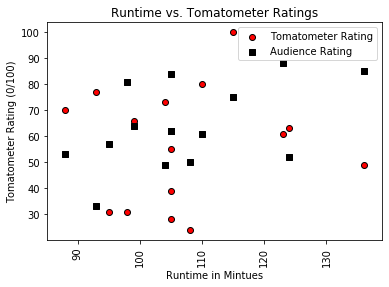

In [17]:
#Scatter Plot of Runtime vs. ratings
#refined_movie_data
# = refined_movie_data
plt.scatter(Disney['Runtime'].sort_values(ascending=True), Disney['Tomatometer Rating'], marker="o", facecolors="red", edgecolors="black")
plt.scatter(Disney['Runtime'], Disney['Audience Rating'], marker="s", facecolors="black", edgecolors="black")
plt.title("Runtime vs. Tomatometer Ratings")
plt.xlabel("Runtime in Mintues")
plt.xticks(rotation=90)
plt.ylabel("Tomatometer Rating (0/100)")
plt.legend(['Tomatometer Rating', 'Audience Rating'])


In [18]:
#Mean of Disney stats
Disney_stats = Disney.describe()
Disney.mean()[["Tomatometer Count", "Audience Count"]]
Disney_mean = Disney.mean()[["Tomatometer Count", "Audience Count"]]
Disney_mean

Tomatometer Count        38.733333
Audience Count       176444.866667
dtype: float64

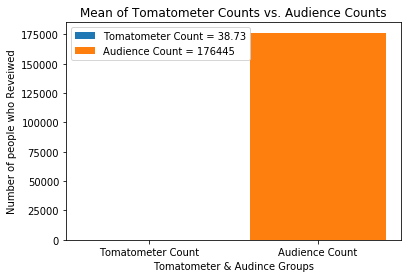

In [19]:
#Bar plot
plt.bar(x="Tomatometer Count", height=Disney_mean['Tomatometer Count'])
plt.bar(x="Audience Count", height=Disney_mean['Audience Count'])
# x_axis.set_xscale('log')
# y_axis.set_yscale('log')
x_axis = np.arange(len(Disney_mean))

plt.title("Mean of Tomatometer Counts vs. Audience Counts")
plt.xlabel("Tomatometer & Audince Groups")
plt.ylabel("Number of people who Reveiwed")
plt.legend(['Tomatometer Count = 38.73', 'Audience Count = 176445'])
plt.savefig("BarMeanPlot")
plt.show()